<a href="https://www.kaggle.com/code/poojami1234/sentiment-analysis-based-on-customer-reviews?scriptVersionId=223256413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

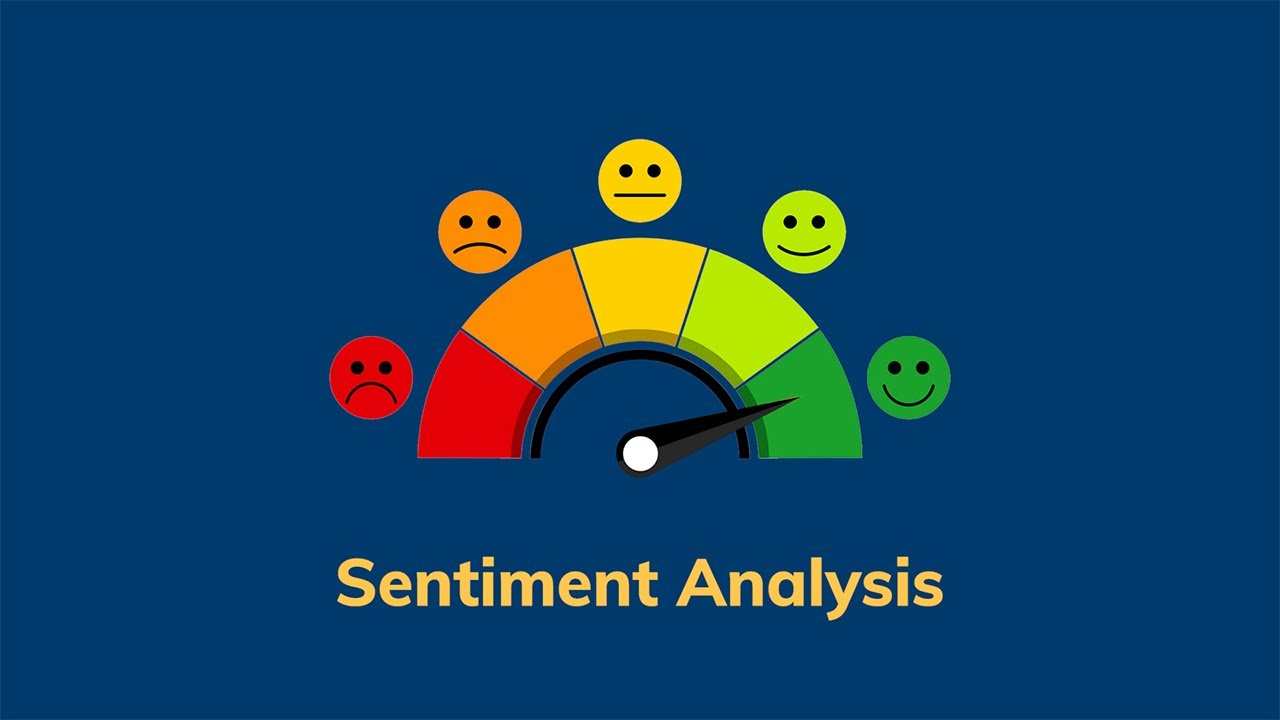
# **Sentiment Analysis on Customer Reviews** 

## **Introduction**

In today's digital marketplace, customers rely heavily on product reviews to make informed purchasing decisions. While star ratings provide a quick summary, analyzing written reviews helps uncover deeper insights into customer sentiment. Sentiment Analysis, powered by Natural Language Processing (NLP), helps businesses understand emotions in customer feedback and refine their strategies accordingly.

## **What is Sentiment Analysis?**

**Sentiment Analysis** is a technique used to determine the emotional tone of a piece of text. It classifies the text into categories like **positive**, **negative**, or **neutral**, allowing businesses to gauge customer sentiments efficiently. With the help of advanced NLP models, businesses can automate the analysis of large volumes of customer reviews, ensuring that they respond to concerns or praises promptly and strategically.

## **Objectives of the Project**

The goal of this project is to build a **sentiment analysis model** that processes customer reviews, extracts valuable insights, and visualizes the data to assist businesses in decision-making. Key objectives include:

1. **Preprocessing and Cleaning Reviews**: Text data often contains noise (e.g., special characters, unnecessary spaces). Cleaning the data ensures that the model receives meaningful input for analysis.
2. **Feature Extraction**: Using **CountVectorizer** to process text data and remove stopwords for better accuracy.
3. **Sentiment Classification**: Using **TextBlob** to classify reviews based on sentiment polarity and subjectivity.
4. **Data Visualization**: Representing sentiment trends through **Tableau dashboards**.

## **Project Overview**

This **sentiment analysis model** aims to process customer feedback related to a product or service, assess the sentiment behind it, and visualize the results. By automating sentiment analysis, businesses can efficiently address customer feedback and enhance customer satisfaction.


## **How This Analysis Can Be Used**

By analyzing customer feedback through sentiment analysis, businesses and organizations can take targeted actions to address negative reviews effectively. This leaves them with two primary options:

1. **Improve Customer Service** – If the feedback criticizes customer interactions, the business can focus on enhancing its service quality. 
2. **Enhance Product Quality** – If the feedback points to product-related issues, the business can focus on product improvements. 

This sentiment analysis tool enables businesses to make **data-driven decisions**, ensuring a better customer experience and long-term success. By understanding customer sentiment, organizations can respond proactively, address concerns, and make necessary changes to improve overall satisfaction.

# **Loading and Exploring the Dataset**



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from transformers import pipeline # For sentiment analysis
import re # For parsing the feedbacks

In [ ]:
file = pd.read_csv("/kaggle/input/amazon-reviews/amazon_reviewp.csv")

df = pd.DataFrame(file)
df.head()

## **Data Preprocessing**

Handling missing values 
Removing special characters and punctuation
Converting text to lowercase
We will be checking all of these things before moving on to our analysis.

In [ ]:
for col in df.columns:
    print(col)

How many unique values does a column have in comparison to the total values in the dataset?

In [ ]:
total = len(df)
for col in df.columns:
    print(f"{col} has {df[col].nunique()}/{total} unique values \n --------------")

After taking a look at this, we understand that the UserID is unique for all entries. Moreover, this dataset talks about one product. We can stick to it for the purpose of creating a small scale analyzer. 

However, this also shows us that there are a lot of columns which we will not be needing to create our analyzer. Those columns are:
1. UserID: unique value, does not provide us with much information
2. ProductID: talks about just one product so we do not need it.
3. UserName: We are not concerned about name of the reviewer.
4. ReviewTitle: we do not need summary, we will be analysing based on the feedback itself
5. reviewTime: timestamps do not matter for now

We can go ahead and drop these columns

In [ ]:
df = df.drop(columns=["UserID","ProductID","UserName","ReviewTitle","reviewTime"])
print(f"Remaining columns: {list(df.columns)}")

In [ ]:
# Checking for duplicated rows

df[df.duplicated()]

In [ ]:
# Checking for null values

df.isnull().sum()

we have a null value, let us drop that row.

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Fixed.

In [ ]:
df.head()

Let's download this data to build our dashboard

In [ ]:
df.to_csv("../working/base_data.csv", index=False)

# Tokenization and Stopword Removal Using CountVectorizer

Let us move on to analyze the sentiment of the sentences. However, we can not run the sentiment analysis on the whole feedback data we have, we need to do some smart analysis and filter out things before that.

We will get into that later. First, let us try out importing the sentiment analyzer and testing it.

## Applying CountVectorizer to tokenize text

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load your data
df = pd.read_csv("/kaggle/input/amazon-reviews/amazon_reviewp.csv")

# Apply sentiment analysis
df["Sentiment_Polarity"] = df["ReviewSummary"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment_Subjectivity"] = df["ReviewSummary"].astype(str).apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Define function to classify sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply classification
df["Sentiment_Label"] = df["Sentiment_Polarity"].apply(classify_sentiment)

# Display first 5 rows of processed data
print(df[["ReviewSummary", "Sentiment_Polarity", "Sentiment_Label"]].head(10))

Okay! It works!
<br><br>
Now, let us not consider the reviews which have 5 star reviews. This is because 5 star means that the product was liked by the customer and customer found no problem with it, hence the 5 stars. We will look into the feedbacks of reviews which have less than 5 stars ratings.<br>
However, due to computational limitation, we will also not be using 4 star reviews as well. Let us limit ourselves to 1, 2 and 3 star reviews.

In [ ]:
# Filtering the data

target_df  = df[df["overall"] <= 4.0]

In [ ]:
target_df.head()

In [ ]:
# How much of data is left?
len(target_df)


We have 993 rows of data which have less than 5 star rating reviews.
We can also remove the stopping words from these feedbacks before sending the data for sentiment analysis.

## Removing common stopwords for better feature extraction

In [ ]:
# Removing Stopping words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample sentence
test = "This is a great sentiment analyzer you are building over here."

# Initialize CountVectorizer with stop_words='english'
vectorizer = CountVectorizer(stop_words='english')

# Transform the sentence into a bag-of-words
word_matrix = vectorizer.fit_transform([test])

# Get the filtered words (tokens)
filtered_words = vectorizer.get_feature_names_out()

print(filtered_words)


In [ ]:
# Testing
test = "This is a great sentiment analyzer you are building over here."

In [ ]:
# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Initialize CountVectorizer with stop_words='english' to remove stopwords
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the sentence using CountVectorizer (this automatically removes stopwords)
X = vectorizer.fit_transform([test])

# Get the feature names (filtered words after stopwords are removed)
filtered_words = vectorizer.get_feature_names_out()

# Join the filtered words back into a sentence
result = " ".join(filtered_words)
# Print the filtered sentence
print(result)

Great! it is working! lets make a function out of this.

In [ ]:
def without_stopping_words(text):
    text = word_tokenize(text)
    return " ".join([word for word in text if word.lower() not in stop_words])

In [ ]:
def without_stopping_words(text):
    # Initialize CountVectorizer with stop_words='english'
    vectorizer = CountVectorizer(stop_words='english')
    
    # Fit and transform the text using CountVectorizer
    X = vectorizer.fit_transform([text])
    
    # Get the feature names (filtered words after stopwords are removed)
    filtered_words = vectorizer.get_feature_names_out()
    
    # Join the filtered words back into a sentence
    return " ".join(filtered_words)
    print(result)

The stopping words are being removed now. What should be our next step?<br>
Consider a 4 star rating review that you would provide. It will have something which you found to be problematic, which is why it did not reach 5 stars. However, it could be having positive reviews, which did not make it a 1 star. Therefore, we can not analyze the feedback as a whole, we will need to break it down by sentences. 

In [ ]:
# Splitting sentences

def split_sentences(sentence):
    result = re.split(r"[.|!|?]",sentence)
    return result

In [ ]:
# lets make a new df with an extra column of sentiment as well

column = list(target_df.columns) + ['sentiment']
new_df = pd.DataFrame(columns=column)

# Sentiment Analysis Using TextBlob

Now let us create a new DataFrame which will have the text and its sentiment analysis

## Calculating polarity and subjectivity scores

In [ ]:
import pandas as pd
from textblob import TextBlob

# Initialize new DataFrame
new_df = pd.DataFrame(columns=["helpful", "ReviewSummary", "overall", "helpful_yes", "total_vote", "sentiment"])

# Function to classify sentiment based on polarity
def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Loop through target_df and apply sentiment analysis
for row in target_df.itertuples(index=True, name="Row"):
    texts = split_sentences(row.ReviewSummary)  # Split into sentences
    for text in texts:
        if text.strip():  # Avoid empty strings
            sentiment_label = classify_sentiment(text)  # Get sentiment

            # Create a new row as a DataFrame
            new_row = pd.DataFrame({
                "helpful": [row.helpful], 
                "ReviewSummary": [text], 
                "overall": [row.overall], 
                 
                "helpful_yes": [row.helpful_yes], 
                "total_vote": [row.total_vote], 
                "sentiment": [sentiment_label]
            })

            # Append to new_df
            new_df = pd.concat([new_df, new_row], ignore_index=True)

# Display the new DataFrame
print(new_df.head())

In [ ]:
new_df

In [ ]:
new_df.to_csv("../working/sentiment.csv", index=False)

We have 3123 rows to consider now for analysis. Let us create a separate column which will have the value of the sentiment which these reviews depict.

In [ ]:
new_df['sentiment'].nunique()

This proves it only has 3 values: Positive, Neutral and Negative

## Filtering and Analyzing Negative Reviews

We will now try to classify a the negative reviews based on what these reviews are talking about using AI.
Let us filter out the "Negative" comments.

In [ ]:
# filtering out negatives

negative_df = new_df[new_df['sentiment'] == "Negative"]
negative_df

Now that we have the comments sorted, let us categorize these comments into predefined classes. This will help us understand which category are the comments about the most. Which will eventually tell us, what are the things the company should be worried about and improve on. <br>

## Classifying reviews into Four Categories

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/kaggle/input/amazon-reviews/amazon_reviewp.csv")

# Define category keywords
categories = {
    "speed": ["fast", "slow", "performance", "quick", "lag", "delay"],
    "capacity": ["storage", "memory", "space", "capacity", "GB", "RAM"],
    "reliability": ["trust", "durable", "reliable", "sturdy", "quality"],
    "price": ["cheap", "expensive", "cost", "affordable", "worth"]
}

# Function to classify reviews into categories
def categorize_feedback(text):
    text = str(text).lower()
    matched_categories = [cat for cat, keywords in categories.items() if any(word in text for word in keywords)]
    return matched_categories[0] if matched_categories else "other"  # Default to "other"

# Apply category classification
df["Category"] = df["ReviewSummary"].apply(categorize_feedback)

# Ensure Sentiment Analysis is applied
from textblob import TextBlob

df["Sentiment_Polarity"] = df["ReviewSummary"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Define function to classify sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment_Label"] = df["Sentiment_Polarity"].apply(classify_sentiment)

# 🔹 Filter only negative reviews
negative_df = df[df["Sentiment_Label"] == "Negative"].copy()

# 🔹 Save the filtered negative reviews
negative_df.to_csv("negative_reviews.csv", index=False)

# 🔹 Display first few rows of negative reviews
print(negative_df[["ReviewSummary", "Category", "Sentiment_Label"]].head())



# Final Dataset

In [ ]:
negative_df.to_csv("../working/final_dataset.csv", index=False)

All done! Let us download the dataset now! to create the dashoboard

# **Data Visualization**  

Here is the link to my **Tableau Dashboard** that I created after completing the project which visualizes the customer feedbacks into meaningful depiction:  
🔗 [**Click Here!**](https://public.tableau.com/views/SentimentAnalysisonCustomerReview/Dashboard1?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Below is a snapshot of my dashboard:  

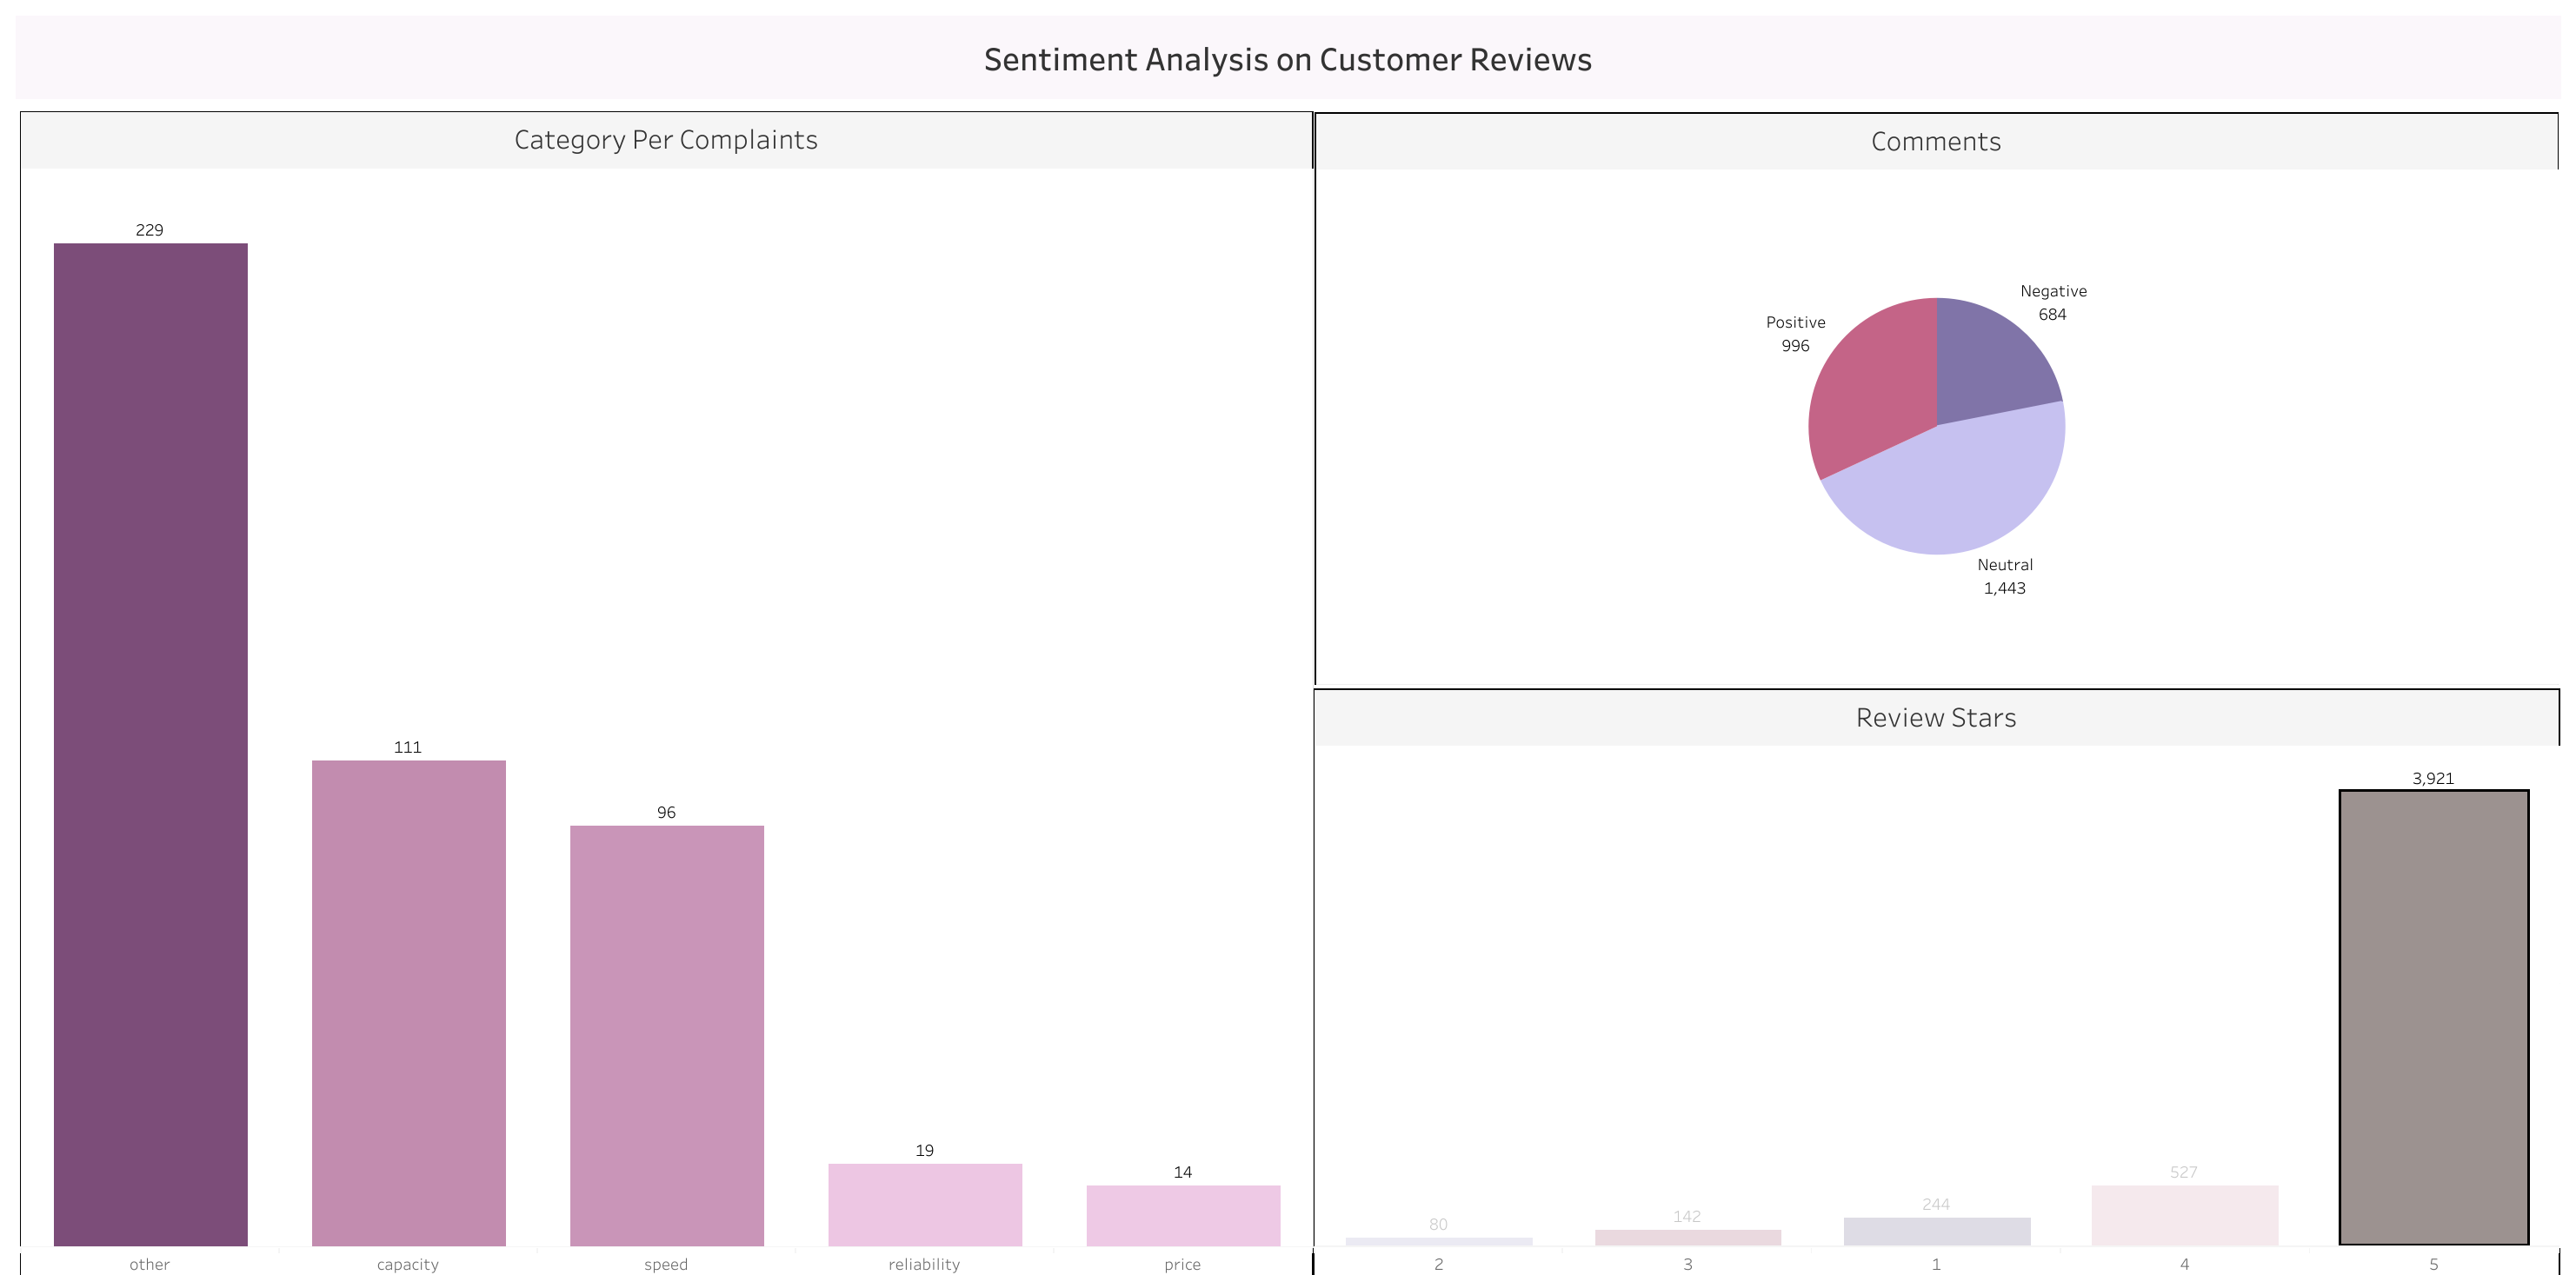

#  Dashboard Analysis: Key Insights  

## 1️ Sentiment Distribution  
- **Neutral** comments are the highest (**1,443**), followed by **Positive (996)** and **Negative (684)**.  
- While most customers are satisfied, some concerns need to be addressed.  

## 2️ Key Complaint Categories  
- The most frequent complaints fall under **"Other" (229 mentions)**, followed by **Capacity (111)** and **Speed (96)**.  
- **Reliability (19)** and **Price (14)** have fewer complaints but still impact customer satisfaction.  

## 3️ Review Star Ratings ⭐  
- **5-star ratings dominate (3,921)**, indicating overall positive feedback.  
- However, **low-star ratings (1⭐: 244, 2⭐: 80, 3⭐: 142, 4⭐: 527)** highlight dissatisfaction areas.  

## 4️ Business Implications  
✔ **Enhance product capacity & speed** to address major concerns.  
✔ **Continue improving quality** to maintain positive sentiment.  
✔ **Investigate "Other" category complaints** for deeper insights.   

# Final Remarks

# Key Findings

* Majority of reviews were **Positive**, showing customer satisfaction with the products.

* Negative reviews focused mostly on **Price** and **Reliability** concerns.

* **Neutral reviews** were typically factual statements without strong sentiment.

# Conclusion & Future Improvements

This project successfully analyzed customer sentiments using **TextBlob** and categorized reviews based on major themes. In the future, we can:

* Use **machine learning models** to improve sentiment accuracy.

* Incorporate **topic modeling** for more granular categorization.

* Expand visualization with more interactive insights using **Tableau or Power BI**.

By leveraging sentiment analysis, businesses can better understand customer needs, address common concerns, and enhance their products accordingly.